# Problem 3 - Clustering

## Problem 3.1 - Hierarchical Clustering: Linkages and Features

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram as dgram, linkage

### Problem 3.1.1 - Clustering class

In [2]:
class HC():
    def __init__(self):
        self.data           = None
        self.linkage_method = None
        self.linkage_matrix = None
        self.dendrogram_var = None

    def linkages(self, X, linkage_type):
        """
        Method to compute the linkage matrix
        """
        self.data           = X
        self.linkage_method = linkage_type
        self.linkage_matrix = linkage(X, linkage_type, optimal_ordering=True)
        # The optimal_ordering flag when set to True provides a better ordering to be displayed in the dendrogram that more
        # acurately depicts the ordering of the leaves so that the distance between the successive leaves is minimal

    def dendrogram(self, Z, linkage_method='single', features=['Genre'], ax=None):
        """
        Method to plot the dendrogram
        """
        s = ''
        for i in range(len(features) - 1):
            s += (' \"' + str(features[i]) + '\"')
            if i < len(features) - 2:
                s += ','
        
        if len(features) > 1:
            s += ' and'
        s += (' \"' + str(features[len(features) - 1]) + '\"')

        title = f'Dendrogram with \"{linkage_method}\" linkage with features:' + s
        
        if ax is None:
            plt.figure()
            self.dendrogram_var = dgram(Z)
            plt.xlabel('Index')
            plt.ylabel('Distance')
            plt.title(title)
            plt.show()

        else:
            self.dendrogram_var = dgram(Z, ax=ax)
            ax.set_xlabel('Index')
            ax.set_ylabel('Distance')
            ax.set_title(title)

### Problem 3.1.2 - Hierarchial clustering on the Customer dataset

In [3]:
customer_data_df = pd.read_csv('./Data/Clustering/new_customers.csv')
customer_data_df = customer_data_df.drop(columns=['CustomerID'])

display(customer_data_df)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


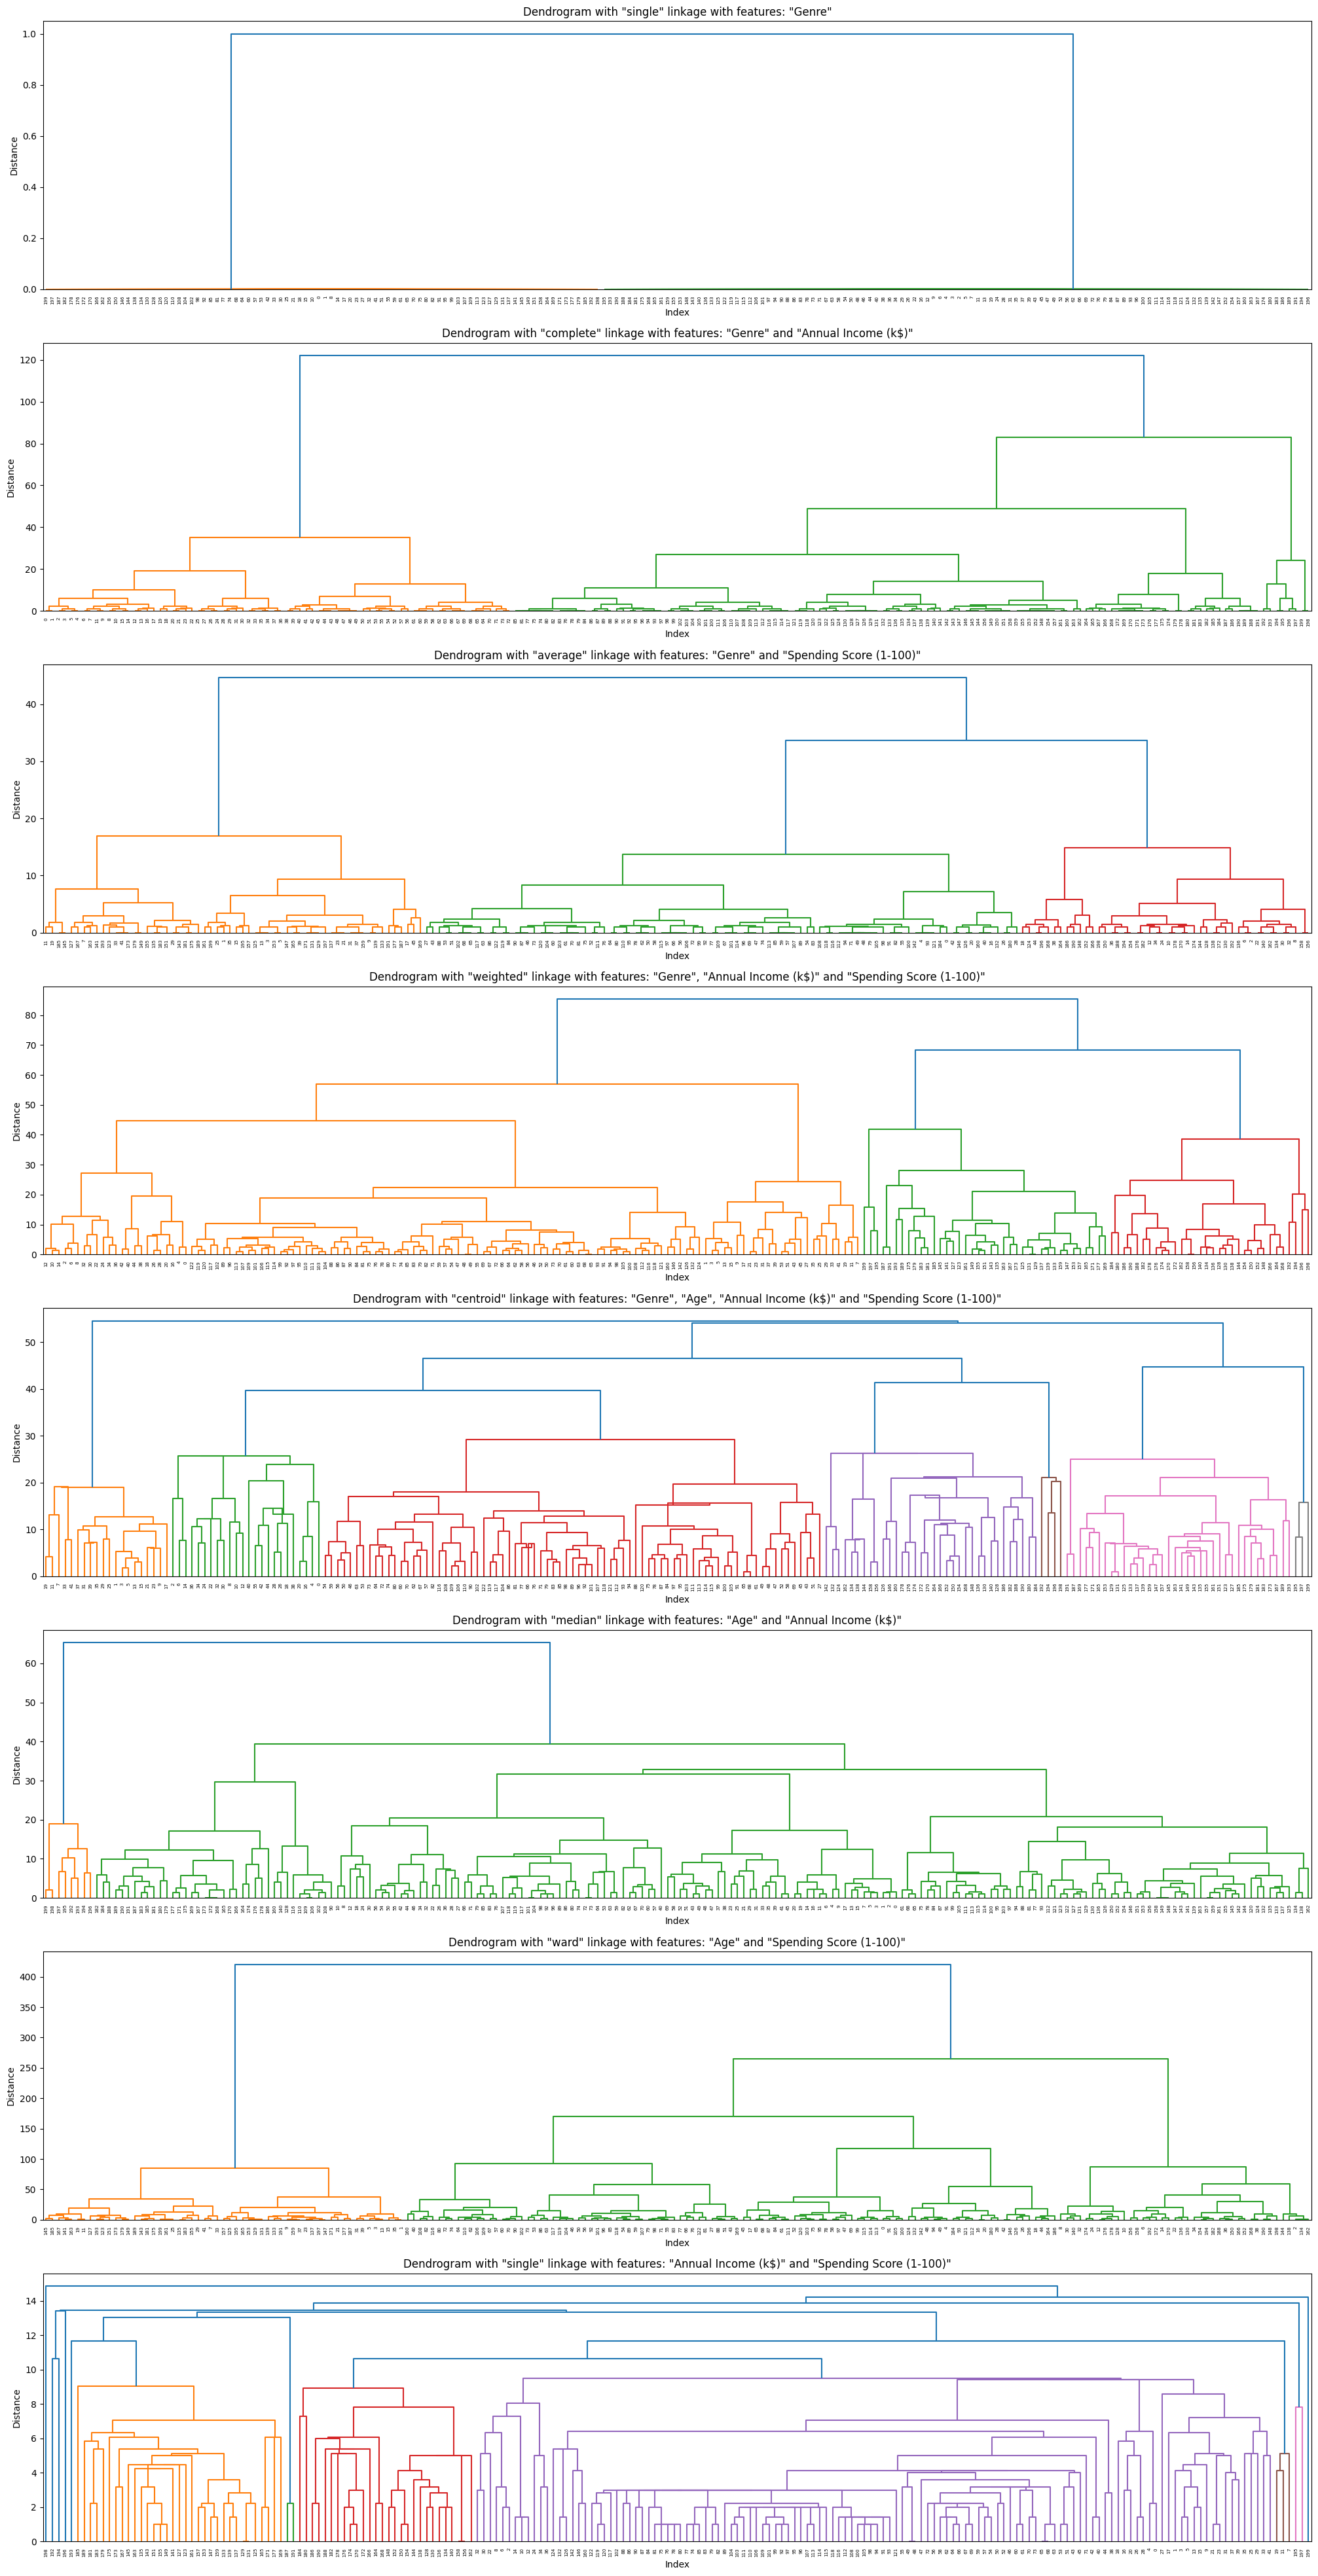

In [4]:
customer_features = [['Genre'], ['Genre', 'Annual Income (k$)'], ['Genre', 'Spending Score (1-100)'], ['Genre', 'Annual Income (k$)', 'Spending Score (1-100)'], ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
                     ['Age', 'Annual Income (k$)'], ['Age', 'Spending Score (1-100)'], ['Annual Income (k$)', 'Spending Score (1-100)']]
linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

fig, axs = plt.subplots(8, 1, figsize=(25, 50))

for i, features in enumerate(customer_features):
    customer_data = customer_data_df[features].to_numpy()

    if features[0] == 'Genre':
        customer_data[:, 0] = customer_data[:, 0] == 'Male'
    # Converting categorical feature to numerical feature

    linkage_method = linkage_methods[i % len(linkage_methods)]

    clusterer = HC()
    clusterer.linkages(customer_data, linkage_method)
    clusterer.dendrogram(clusterer.linkage_matrix, linkage_method, features, axs[i])

plt.show()

- #### As observed in the above plots, wherever the "Genre" feature is present, we can observe that there is an intial division into two major clusters, as is expected, as there are two values - Male and Female, which provides a distinct separation between the records

### Problem 3.1.3 - Hierarchial Clustering on the Gene Expression dataset

In [5]:
gene_data_df = pd.read_csv('./Data/Clustering/gene.csv')
gene_data_df = gene_data_df.drop(columns=['ID_REF'])

display(gene_data_df)

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,5192.230000,5974.650000,5393.020000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,301.503000,307.677000,362.596000,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,1850.110000,2037.540000,1891.180000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,927.983000,1140.820000,936.433000,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,5.249740,5.017300,5.095850,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062
5,9.387960,8.481250,8.842170,6.57887,7.93186,8.89203,9.00878,8.01693,9.97759,9.42498,8.14469,7.04968
6,21.053700,21.974900,20.089100,18.08180,19.94690,18.88650,18.27040,18.69870,22.72940,20.63030,18.47490,17.29990
7,48.830500,52.573200,48.165400,52.53910,45.28810,46.77410,47.38890,50.22880,49.29140,51.55040,47.68180,48.11590
8,677.660000,736.404000,913.221000,833.52800,797.24600,812.74600,793.95200,767.29900,807.24800,859.43700,835.13800,798.52200
9,5.663750,6.366670,4.817760,4.89682,5.17924,6.31512,4.89282,5.26197,6.01668,6.80280,4.90521,4.45203


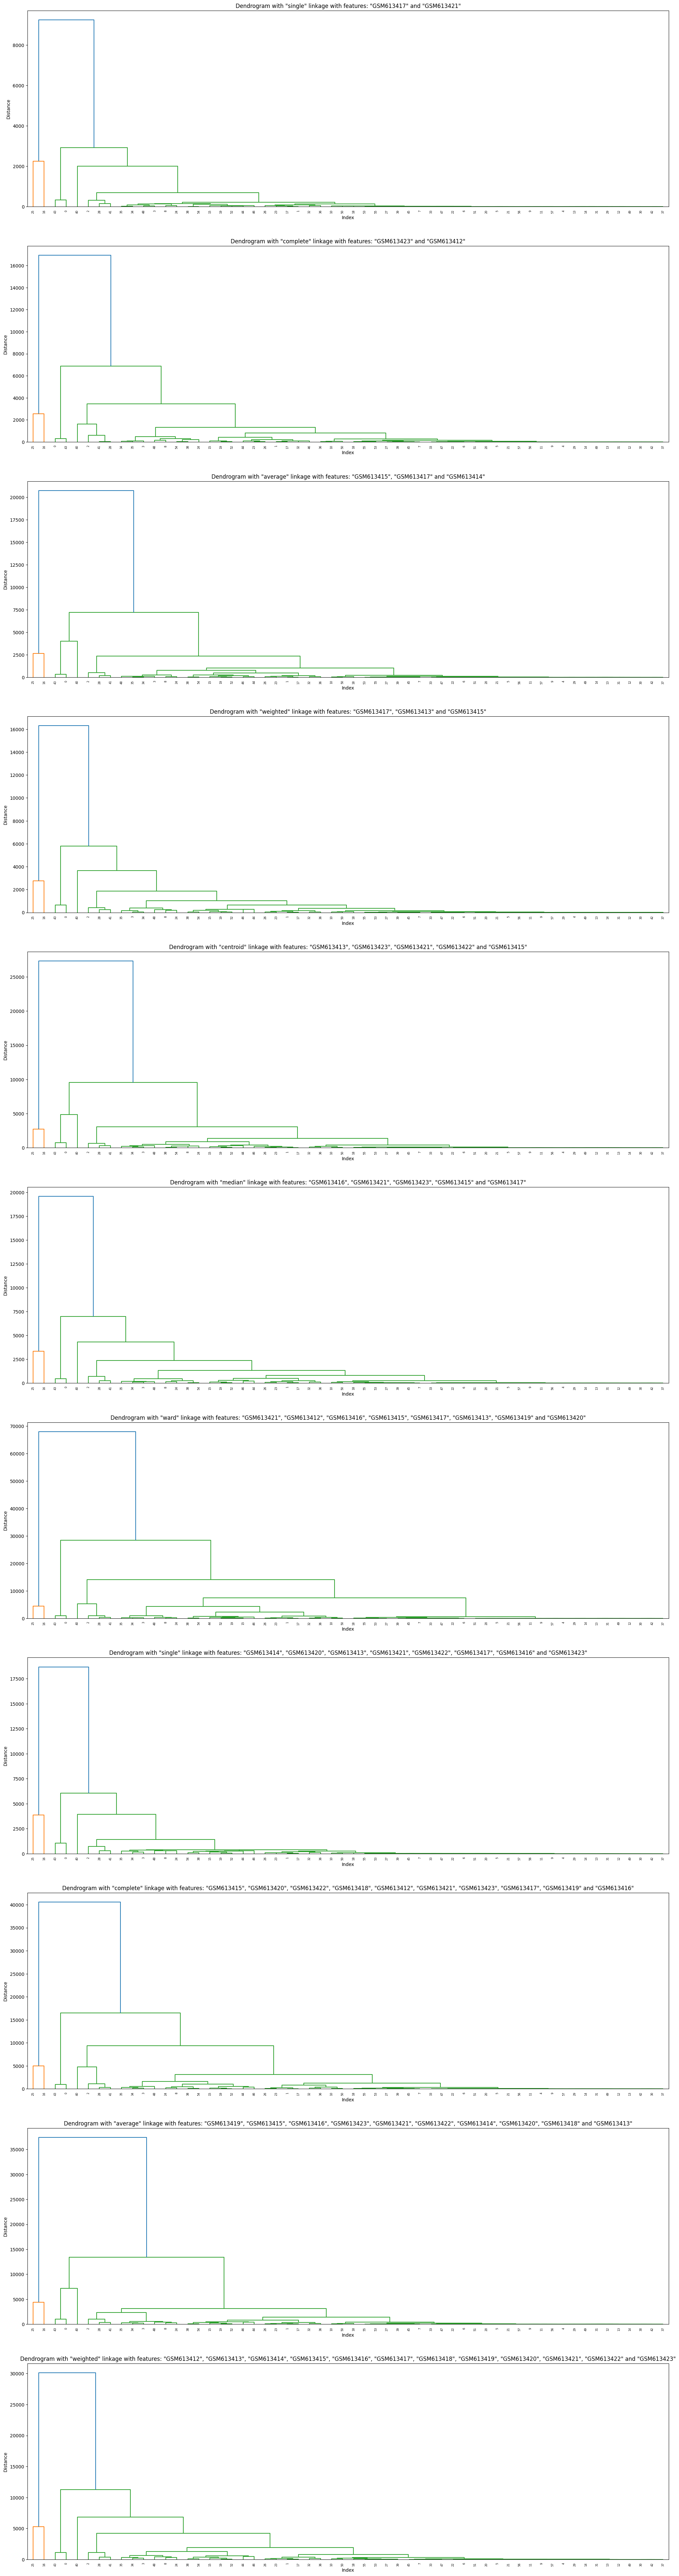

In [6]:
gene_data_columns = gene_data_df.columns.values
num_features_list = [2, 3, 5, 8, 10]
gene_features = []
linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for i in num_features_list:
    gene_features.append(np.random.choice(gene_data_columns, size=i, replace=False))
    gene_features.append(np.random.choice(gene_data_columns, size=i, replace=False))
gene_features.append(gene_data_columns)

fig, axs = plt.subplots(11, 1, figsize=(25, 100))

for i, features in enumerate(gene_features):
    gene_data = gene_data_df[features].to_numpy()
    linkage_method = linkage_methods[i % len(linkage_methods)]

    clusterer = HC()
    clusterer.linkages(gene_data, linkage_method)
    clusterer.dendrogram(clusterer.linkage_matrix, linkage_method, features, axs[i])

plt.show()

- #### It can be observed that there are primarily atleast three clusters
- #### The orange cluster stands out everytime regardless of the features considered
- #### The cluster beside the orange cluster also appears almost regualarly